In [21]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import cv2 
from skimage.transform import resize

## Read in the HS images from disk

In [22]:
test_img_paths = [img_path for img_path in glob.glob("../../gds_image_clips/drive-download-20171016T045654Z-001/image_clips_MX_Benchmark?/image_clips/BM?_HST?_*.png")]

num_imgs = len(test_img_paths)
print(num_imgs)
#print(test_img_paths[1].shape)

'''
test_img=np.uint8(np.zeros((num_imgs,480,480)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(480,480), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
'''

1303


## Show the first 10 HS images 
## Try different downsampling sizes 480x480 (x10 reduce), 48x48 (x100), 120x120 (x40)

(1303, 480, 480)


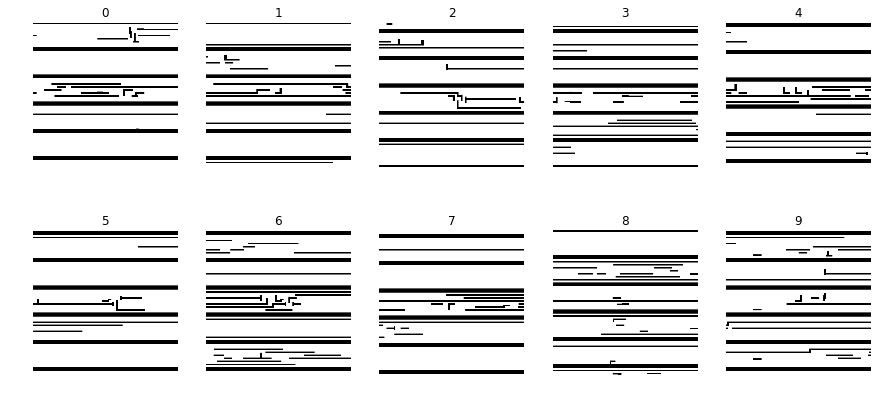

In [23]:
# 1303 x 4800 x 4800
test_img=np.uint8(np.zeros((num_imgs,480,480)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(480,480), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

(1303, 48, 48)


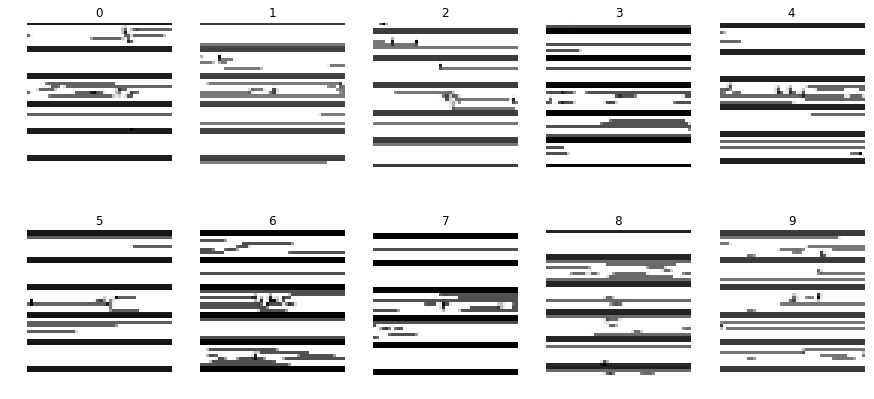

In [24]:
test_img=np.uint8(np.zeros((num_imgs,48,48)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(48,48), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

(1303, 120, 120)


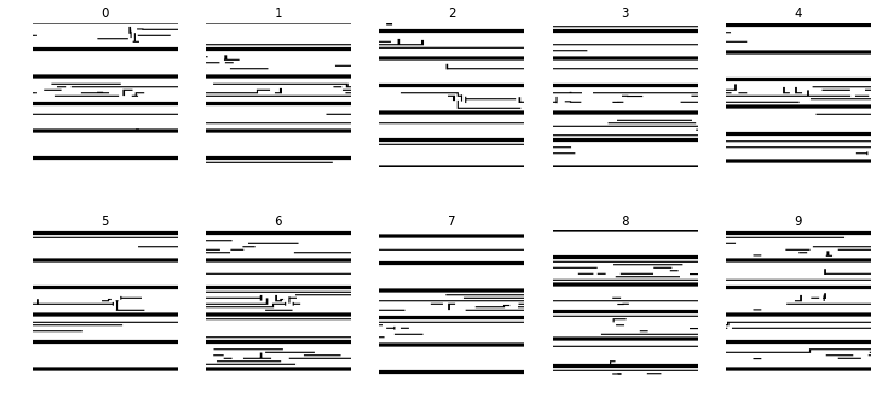

In [28]:
test_img=np.uint8(np.zeros((num_imgs,120,120)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(120,120), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Crop the center core region (1.2umx 1.2um)

(1303, 120, 120)
(1303, 30, 30)


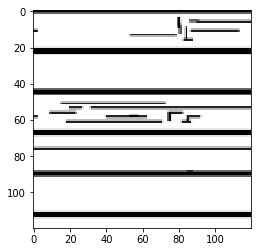

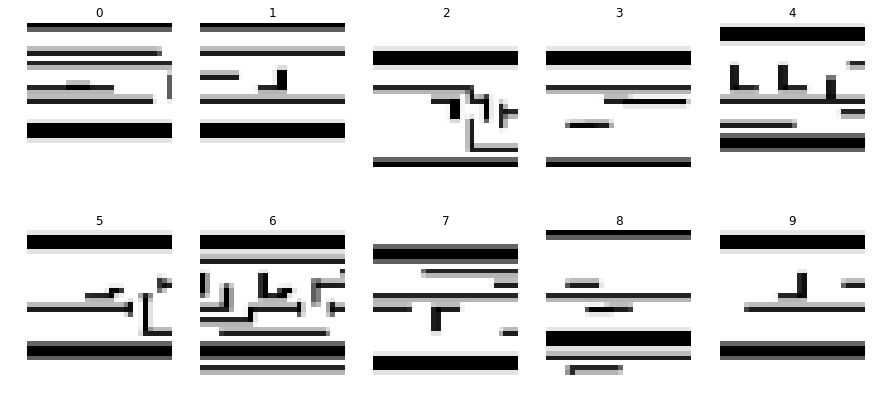

In [33]:
print(test_img.shape)
plt.imshow(test_img[0], cmap='Greys')
crop_img_list = np.uint8(np.zeros((num_imgs,30,30)))
crop_img_list = test_img[:, 45:75, 45:75]

#for i, imp in enumerate(test_img):
#    #NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
#    crop_img = img[45:75, 45:75]
#    crop_img_list[i]=crop_img

plt.figure(figsize=(15, 7))
print(crop_img_list.shape)


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(crop_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Plot the image histogram

255
0


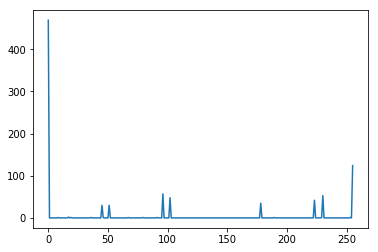

In [34]:
# Plot the image histogram to confirm that there are pixels with 0(black) and 255(white) values
print(crop_img_list[0].max())
print(crop_img_list[0].min())
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([crop_img_list[0]],[0],None,[256],[0,256])
plt.plot(hist)
#plt.hist(crop_img_list[0].ravel(),256,[0,256])
plt.show()

## Random sample 10 images from the HS list

[901, 274, 1111, 619, 679, 522, 11, 328, 498, 409]
0 901
1 274
2 1111
3 619
4 679
5 522
6 11
7 328
8 498
9 409


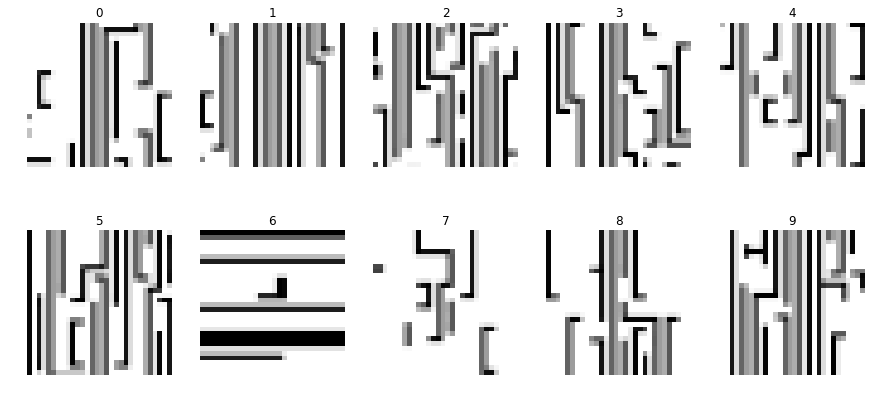

In [42]:
from sklearn.model_selection import train_test_split
import random

random_img_index = random.sample(range(num_imgs), 10)
print(random_img_index)

random_img_list = np.uint8(np.zeros((num_imgs,30,30)))
for i, random_idx in enumerate(random_img_index):
    print(i, random_idx)
    random_img_list[i] = crop_img_list[random_idx]


plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Read in all NH images and downsampled to 120x120

17436
(17436, 120, 120)


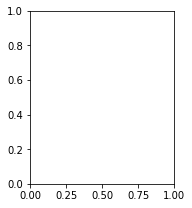

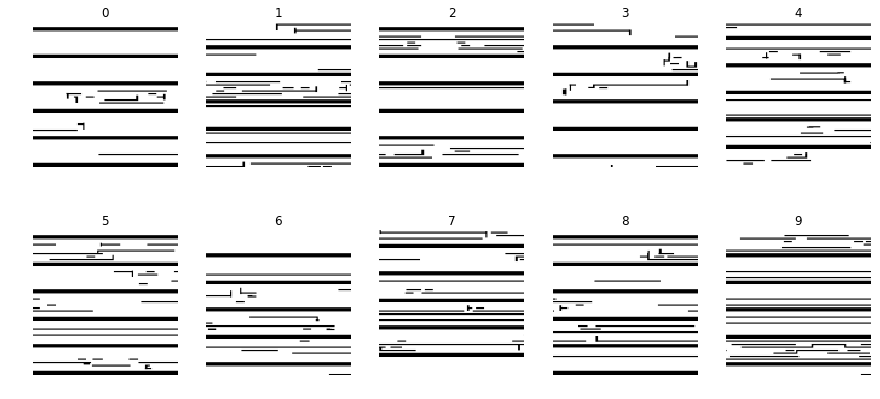

In [38]:
# Read in the downsample all the 17436 NH images takes about 26 mins
nh_img_paths = [nh_img_path for nh_img_path in glob.glob("../../gds_image_clips/drive-download-20171016T045654Z-001/image_clips_MX_Benchmark?/image_clips/BM?_NH_*.png")]

nh_num_imgs = len(nh_img_paths)
print(nh_num_imgs)
#print(test_img_paths[1].shape)


nh_img=np.uint8(np.zeros((nh_num_imgs,120,120)))
for i, imp in enumerate(nh_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(120, 120), interpolation = cv2.INTER_AREA)
    nh_img[i]=img_resized
    
print(nh_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

In [43]:
# NH: 17436x120x120    HS: 1303x120x120
# number of images x dimensions 
import pickle
pickle.dump(nh_img, open( "./pickled_data/all_nh_imgs_120x120.p", "wb" ) )
pickle.dump(test_img, open( "./pickled_data/all_hs_imgs_120x120.p", "wb" ) )

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import cv2 
from skimage.transform import resize
import pickle
import random

In [2]:
nh_img = './pickled_data/all_nh_imgs_120x120.p'
hs_img = './pickled_data/all_hs_imgs_120x120.p'



with open(nh_img, mode='rb') as f:
    nh_img_pickled = pickle.load(f)
with open(hs_img, mode='rb') as f:
    hs_img_pickled = pickle.load(f)


17436
(17436, 120, 120)
<class 'numpy.ndarray'>
(17436, 30, 30)


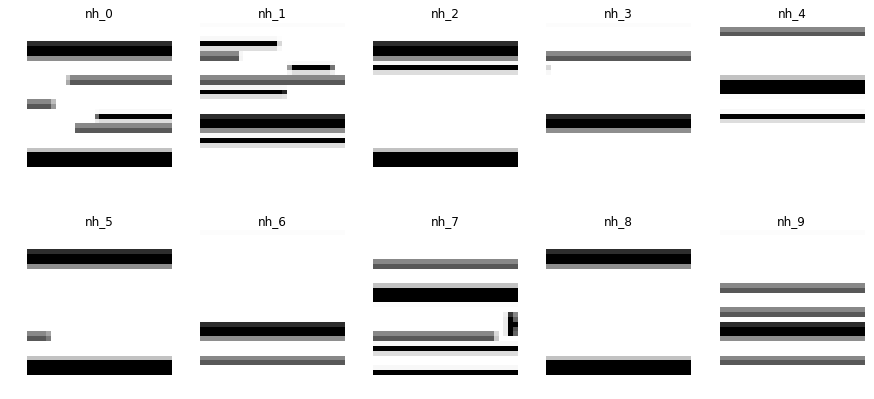

1303
(1303, 120, 120)
<class 'numpy.ndarray'>
(1303, 30, 30)


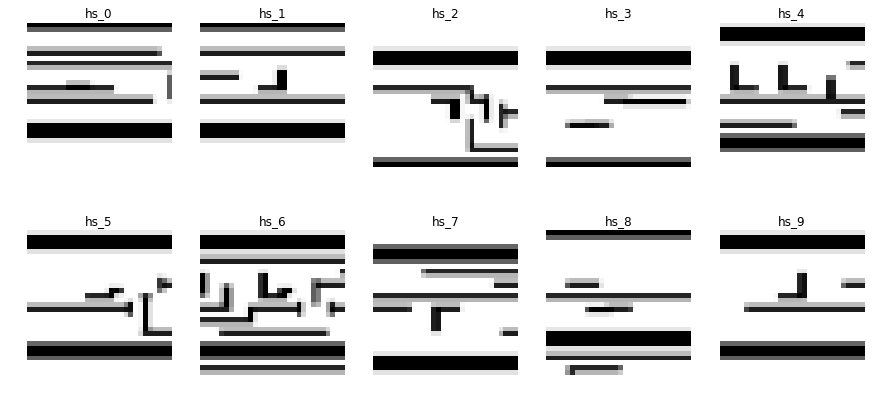

In [35]:
nh_num_imgs = len(nh_img_pickled)
print(nh_num_imgs)
print(nh_img_pickled.shape)
print(type(nh_img_pickled))

#plt.imshow(nh_img_pickled[0], cmap='Greys')
nh_crop_img_list = np.uint8(np.zeros((nh_num_imgs,30,30)))
nh_crop_img_list = nh_img_pickled[:, 45:75, 45:75]

plt.figure(figsize=(15, 7))
print(nh_crop_img_list.shape)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_crop_img_list[i], cmap='Greys') 
    plt.title("nh_"+str(i))
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()


hs_num_imgs = len(hs_img_pickled)
print(hs_num_imgs)
print(hs_img_pickled.shape)
print(type(hs_img_pickled))

#plt.imshow(nh_img_pickled[0], cmap='Greys')
hs_crop_img_list = np.uint8(np.zeros((hs_num_imgs,30,30)))
hs_crop_img_list = hs_img_pickled[:, 45:75, 45:75]

plt.figure(figsize=(15, 7))
print(hs_crop_img_list.shape)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(hs_crop_img_list[i], cmap='Greys') 
    plt.title("hs_"+str(i))
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

255
0


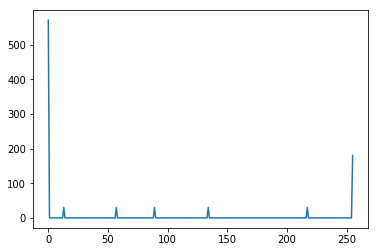

In [15]:
print(nh_crop_img_list[0].max())
print(nh_crop_img_list[0].min())
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([nh_crop_img_list[2]],[0],None,[256],[0,256])
plt.plot(hist)
#plt.hist(crop_img_list[0].ravel(),256,[0,256])
plt.show()

[4183, 16405, 11189, 15538, 15099, 16800, 8051, 13352, 16576, 8047]
0 4183
1 16405
2 11189
3 15538
4 15099
5 16800
6 8051
7 13352
8 16576
9 8047


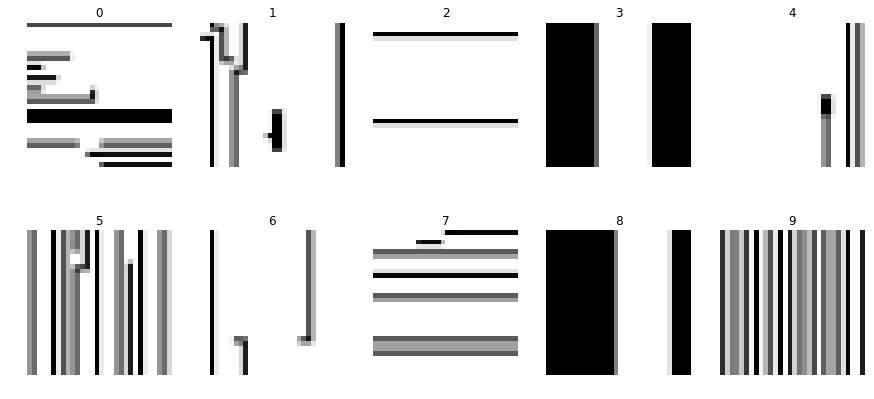

In [18]:
nh_random_img_index = random.sample(range(nh_num_imgs), 10)
print(nh_random_img_index)

nh_random_img_list = np.uint8(np.zeros((nh_num_imgs,30,30)))
for i, random_idx in enumerate(nh_random_img_index):
    print(i, random_idx)
    nh_random_img_list[i] = nh_crop_img_list[random_idx]


plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_random_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()


In [25]:
# BenchMark   HST1   HST2    NH
# 1           60     39      340
# 2           173    1       5285
# 3           892    17      4643
# 4           90     5       4452
# 5           25     1       2716
# Total       1240   63      17436

hs_label_list1 = np.ones((99,), dtype=np.int)
hs_label_list2 = np.ones((174,), dtype=np.int)
hs_label_list3 = np.ones((909,), dtype=np.int)
hs_label_list4 = np.ones((95,), dtype=np.int)
hs_label_list5 = np.ones((26,), dtype=np.int)
hs_label_list_all = np.concatenate((hs_label_list1, hs_label_list2, hs_label_list3, hs_label_list4, hs_label_list5), axis=0)
print(hs_label_list_all.shape)

nh_label_list1 = np.zeros((340,), dtype=np.int)
nh_label_list2 = np.zeros((5285,), dtype=np.int)
nh_label_list3 = np.zeros((4643,), dtype=np.int)
nh_label_list4 = np.zeros((4452,), dtype=np.int)
nh_label_list5 = np.zeros((2716,), dtype=np.int)
nh_label_list_all = np.concatenate((nh_label_list1, nh_label_list2, nh_label_list3, nh_label_list4, nh_label_list5), axis=0)
print(nh_label_list_all.shape)

all_labels = np.concatenate((hs_label_list_all, nh_label_list_all), axis=0)
print(all_labels.shape)
print(all_labels[0:10])
print(all_labels[1303:1313])

(1303,)
(17436,)
(18739,)
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0]


In [32]:
nh_random_img_index_select = random.sample(range(nh_num_imgs), 1303)
print(np.array(nh_random_img_index_select).shape)
print(nh_random_img_index_select[0:10])

nh_label_random_selected = np.array([nh_label_list_all[i] for i in nh_random_img_index_select])

nh_img_random_selected = np.array([nh_crop_img_list[i] for i in nh_random_img_index_select])

print(nh_label_random_selected.shape)
print(nh_img_random_selected.shape)

(1303,)
[8335, 402, 13976, 16430, 13348, 12520, 16857, 7025, 2078, 309]
(1303,)
(1303, 30, 30)


In [31]:
selected_labels = np.concatenate((hs_label_list_all, nh_label_random_selected), axis=0)
print(selected_labels.shape)
print(selected_labels[0:10])
print(selected_labels[1303:1313])

(2606,)
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0]


In [36]:
nh_img_random_selected

nh_img_with_label = {'images': nh_img_random_selected,
             'labels': nh_label_random_selected}
hs_img_with_label = {'images': hs_crop_img_list,
             'labels': hs_label_list_all}

pickle.dump(nh_img_with_label, open( "./pickled_data/1303_nh_imgs_and_labels_30x30.p", "wb" ) )
pickle.dump(hs_img_with_label, open( "./pickled_data/1303_hs_imgs_and_labels_30x30.p", "wb" ) )
